In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
import matplotlib.pyplot as plt


nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Load the dataset
df = pd.read_csv('/content/all_kindle_review .csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


# Data Preprocessing

## Converting to Lower Case

In [ ]:
df['cleaned-review'] = df['reviewText'].str.lower()
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned-review
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,"jace rankin may be short, but he's nothing to ..."
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,great short read. i didn't want to put it dow...
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,i'll start by saying this is the first of four...
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,aggie is angela lansbury who carries pocketboo...
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,i did not expect this type of book to be in li...


## Removing Punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuations(text):
    # Ensure the text is a string (convert NaN or other non-string values to empty string)
    if not isinstance(text, str):
        text = ""

    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [ ]:
df['cleaned-review'] = df['cleaned-review'].apply(lambda x: remove_punctuations(x))
df.head(10)

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned-review
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,jace rankin may be short but hes nothing to me...
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,great short read i didnt want to put it down ...
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,ill start by saying this is the first of four ...
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,aggie is angela lansbury who carries pocketboo...
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,i did not expect this type of book to be in li...
5,5,3744,B0021L9YDK,"[6, 6]",5,Aislinn is a little girl with big dreams. Afte...,"12 7, 2009",A3J5NN6MJK4M4A,"Aubrie A. Dionne ""Fantasy, Sci Fi Author""",A story of a little girl with big dreams.,1260144000,aislinn is a little girl with big dreams after...
6,6,13641,B0038NN38W,"[1, 1]",2,This has the makings of a good story... unfort...,"08 18, 2011",A531QY5K7JVXI,Chicano,This story has potential but ultimately disapp...,1313625600,this has the makings of a good story unfortuna...
7,7,4448,B002AJ7X2C,"[1, 1]",4,I got this because I like collaborated short s...,"03 8, 2010",AN8ELR6AHMMQ,"Jessss ""I read to find stories that inspire m...",Good thriller,1268006400,i got this because i like collaborated short s...
8,8,2797,B001L5T22U,"[0, 0]",5,"Loved this book, I am hooked on this series an...","09 30, 2013",AMSWCFSQ8SLK9,Amazon Customer,Loved it!,1380499200,loved this book i am hooked on this series and...
9,9,5294,B002F3PPVE,"[0, 1]",4,"And that's a good thing. Short, sweet tease th...","07 29, 2009",AB53C7GYZHYIE,"A. Williams ""blkkat""",I was scared...,1248825600,and thats a good thing short sweet tease that ...


## Removing Stopwords

In [ ]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
Stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
     # Ensure the text is a string (convert NaN or other non-string values to empty string)
    if not isinstance(text, str):
        text = ""
    return " ".join([word for word in text.split() if word not in Stopwords])

In [ ]:
df['cleaned-review'] = df['cleaned-review'].apply(lambda x: remove_stopwords(x))
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned-review
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,jace rankin may short hes nothing mess man hau...
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,great short read didnt want put read one sitti...
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,ill start saying first four books wasnt expect...
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,aggie angela lansbury carries pocketbooks inst...
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,expect type book library pleased find price right


## Removing Frequent Words

In [ ]:
from collections import Counter
word_count = Counter()
for text in df['cleaned-review']:
    for word in text.split():
        word_count[word] += 1

word_count.most_common(10)

[('book', 12304),
 ('story', 9469),
 ('read', 7813),
 ('one', 5729),
 ('like', 5020),
 ('good', 4275),
 ('would', 4093),
 ('characters', 4085),
 ('really', 3842),
 ('love', 3566)]

## Removing Rare Words

In [ ]:
Rare_words = set((word, wc) for (word, wc) in word_count.most_common()[:-10:-1])
Rare_words

{('apocalypticadventure', 1),
 ('armors', 1),
 ('certificate', 1),
 ('costeven', 1),
 ('custommade', 1),
 ('draftees', 1),
 ('encorporate', 1),
 ('infantry', 1),
 ('timemy', 1)}

## Removing Special Characters

In [ ]:
import re
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [ ]:
df['cleaned-review'] = df['cleaned-review'].apply(lambda x: remove_spl_chars(x))
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned-review
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,jace rankin may short hes nothing mess man hau...
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,great short read didnt want put read one sitti...
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,ill start saying first four books wasnt expect...
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,aggie angela lansbury carries pocketbooks inst...
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,expect type book library pleased find price right


## Drop Columns

In [ ]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful'], inplace = True)
df.head()

,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned-review
0,3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,jace rankin may short hes nothing mess man hau...
1,5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,great short read didnt want put read one sitti...
2,3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,ill start saying first four books wasnt expect...
3,3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,aggie angela lansbury carries pocketbooks inst...
4,4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,expect type book library pleased find price right


## Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
df['stemmed_text'] = df['cleaned-review'].apply(lambda x: stem_words(x))
df.head()

,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned-review,stemmed_text
0,3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,jace rankin may short hes nothing mess man hau...,jace rankin may short he noth mess man haul sa...
1,5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,great short read didnt want put read one sitti...,great short read didnt want put read one sit s...
2,3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,ill start saying first four books wasnt expect...,ill start say first four book wasnt expect 34c...
3,3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,aggie angela lansbury carries pocketbooks inst...,aggi angela lansburi carri pocketbook instead ...
4,4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,expect type book library pleased find price right,expect type book librari pleas find price right


## Tokenization

In [ ]:
# Check cleaned review column
if 'cleaned-review' not in df.columns:
    raise ValueError("Column 'cleaned-review' is missing. Ensure text preprocessing is done.")

# Tokenization
# Define maximum number of unique tokens to keep
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>") # <OOV> handles out-of-vocabulary words
tokenizer.fit_on_texts(df['cleaned-review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned-review'])

# Padding the sequences
# Define maximum length of sequences (truncate/pad to this length) (truncate= removing a token from the longest sequence in the pair until the proper length is reached)
max_len = 200
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Display example of tokenized and padded text
print("Sample Original Review: ", df['cleaned-review'].iloc[0])
print("Tokenized Sequence: ", sequences[0])
print("Padded Sequence: ", padded_sequences[0])

# Create DataFrame for tokenized data
processed_data = pd.DataFrame(padded_sequences.tolist(), columns=[f"word_{i+1}" for i in range(max_len)])
processed_data['rating'] = df['rating'].values # Adds sentiment labels

# Display processed DataFrame
print("\nProcessed DataFrame (Tokenized and Padded): ")
print(processed_data.head())



Sample Original Review:  jace rankin may short hes nothing mess man hauled saloon undertaker knows hes famous bounty hunter oregon 1890s shot man saloon finished years long quest avenge sisters murder trying figure next snottynosed farm boy rescued gang bullies offers money kill man forced ranch reluctantly agrees bring man justice kill outright first needs tell sisters widower newskyla kyle springer bailey riding trails sleeping ground past month trying find jace wants revenge man killed husband took ranch amongst crimes shes keen detour jace wants take realizes shes options hides behind boy persona best tries keep pace confrontation along way gets shot jace discovers kyles kyla come clean whole reason needs scoundrel dead hope hell still help herthe book share touching moments slowblooming romance kyla find good reason fear men hide behind boys persona watching jace slowly pull shell help conquer fears endearing pain real deeplyrooted didnt disappear face sexiness neither understanda

## Lemmatization & POS-Tagging

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatize_words(text):
    # Splits text into words and find POS tags
    pos_text = pos_tag(text.split())
    # Lemmatize each word based on its POS tags
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

In [ ]:
wordnet.NOUN

'n'

In [ ]:
# Applying the function to the 'cleaned-review' column
df['lemmatize_text'] = df['cleaned-review'].apply(lambda x: lemmatize_words(x))
df.head()

,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned-review,stemmed_text,lemmatize_text
0,3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,jace rankin may short hes nothing mess man hau...,jace rankin may short he noth mess man haul sa...,jace rankin may short he nothing mess man haul...
1,5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,great short read didnt want put read one sitti...,great short read didnt want put read one sit s...,great short read didnt want put read one sit s...
2,3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,ill start saying first four books wasnt expect...,ill start say first four book wasnt expect 34c...,ill start say first four book wasnt expect 34c...
3,3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,aggie angela lansbury carries pocketbooks inst...,aggi angela lansburi carri pocketbook instead ...,aggie angela lansbury carry pocketbook instead...
4,4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,expect type book library pleased find price right,expect type book librari pleas find price right,expect type book library please find price right


# Model training

## Defining each row as positive, neutral or negative

In [ ]:
df['rating'].value_counts()

,count
rating,
5,3000
4,3000
3,2000
2,2000
1,2000


In [ ]:
len(df)

12000

In [ ]:
df_neg = df.loc[df['rating'] < 3]
df_neg = df_neg.reset_index(drop=True)  # Reset the index of the resulting DataFrame

In [ ]:
df_post = df.loc[df['rating'] > 3]
df_post = df_post.reset_index(drop = True)

In [ ]:
df_neut = df.loc[df['rating'] == 3]
df_neut = df_neut.reset_index(drop = True)

In [ ]:
print(len(df_neg))
print(len(df_post))
print(len(df_neut))

4000
6000
2000


In [ ]:
df_post = df_post.iloc[:len(df_neut)]
df_neg = df_neg.iloc[:len(df_neut)]

In [ ]:
print(len(df_neg))
print(len(df_post))
print(len(df_neut))

2000
2000
2000


In [ ]:
df_all = pd.concat([df_neg, df_post, df_neut], axis=0)
df_all = df_all.reset_index(drop=True)

In [ ]:
len(df_all)

6000

In [ ]:
# Check how many ratings are exactly 3
print(df_all['rating'].value_counts())

rating
3    2000
1    1020
4    1010
5     990
2     980
Name: count, dtype: int64


In [ ]:
df_all.head()

,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned-review,stemmed_text,lemmatize_text
0,2,This has the makings of a good story... unfort...,"08 18, 2011",A531QY5K7JVXI,Chicano,This story has potential but ultimately disapp...,1313625600,makings good story unfortunately disappointsit...,make good stori unfortun disappointsit tell tw...,making good story unfortunately disappointsit ...
1,1,"I received a copy of book to review. ""A secret...","10 10, 2011",A1W50RO0EBZF8B,Elysa,"Um, no.",1318204800,received copy book review secret society fanat...,receiv copi book review secret societi fanat c...,receive copy book review secret society fanati...
2,1,I read the other reviews and decided to give i...,"05 23, 2012",A38STH7HRC6ACX,aVaReader,Truly Awful,1337731200,read reviews decided give try despite review l...,read review decid give tri despit review label...,read review decide give try despite review lab...
3,2,I was very disappointed with this book... not ...,"08 14, 2012",A1IVBDLAO9MP4A,Grampy,Pretty Pathetic,1344902400,disappointed book anything blonds one figured ...,disappoint book anyth blond one figur 500 joke...,disappointed book anything blonds one figure 5...
4,1,How many times is author going to get Amazon t...,"05 21, 2012",A3KXRMTQ39ZBRW,Ed & Julie Vickers,How in the world is this so highly rated?,1337558400,many times author going get amazon delete add ...,mani time author go get amazon delet add comme...,many time author go get amazon delete add comm...


## Setting up setiment column to classify reviews as positive, negative, or neutral

In [ ]:
df_all["Sentiment"] = np.where(
    df_all['rating'] > 3, "Positive",
    np.where(df_all['rating'] == 3, "Neutral", "Negative")
)

In [ ]:
df_all = df_all.sample(frac = 1)
df_all = df_all.reset_index(drop = True)

In [ ]:
df_all.head()

,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned-review,stemmed_text,lemmatize_text,Sentiment
0,3,I wouldn't call it original. I have read sever...,"09 7, 2012",A1W15QG2GJCX1B,Ally D,An Okay read!,1346976000,wouldnt call original read several books simil...,wouldnt call origin read sever book similar ho...,wouldnt call original read several book simila...,Neutral
1,2,I knew when I got this that it was flash ficti...,"07 8, 2012",A2G40UM2BSYTO8,Fallen Angel,Disappointing.,1341705600,knew got flash fiction wasnt expecting novel a...,knew got flash fiction wasnt expect novel anyt...,knew get flash fiction wasnt expect novel anyt...,Negative
2,5,Two cowboys save a lady running from a cheatin...,"09 6, 2012",A1VTZ3WUU5ORH7,Alared,Strong and sexy,1346889600,two cowboys save lady running cheating exa str...,two cowboy save ladi run cheat exa strong stor...,two cowboy save lady run cheat exa strong stor...,Positive
3,3,It was a quick read and was straight to the po...,"03 10, 2013",A2EJB1SYOTWK5V,Charming,Quick read,1362873600,quick read straight point story okay,quick read straight point stori okay,quick read straight point story okay,Neutral
4,3,Not sure how I would cataloge this book. Not m...,"05 28, 2014",A2SU0B8S0VWPH8,R G,not sure,1401235200,sure would cataloge book kind love kind sex st...,sure would catalog book kind love kind sex sti...,sure would cataloge book kind love kind sex st...,Neutral


In [ ]:
# Check unique values in the Sentiment column
print(df_all["Sentiment"].unique())

['Neutral' 'Negative' 'Positive']


## Training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_all.lemmatize_text, df_all.Sentiment)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_vector = v.fit_transform(x_train)
x_test_vector = v.transform(x_test)

## Classification model (SVM)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [ ]:
from sklearn.svm import SVC
# Train SVM model
clf = SVC(kernel='linear', class_weight='balanced')  # Use linear kernel
clf.fit(x_train_tfidf, y_train)

SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Predict and evaluate
y_pred = clf.predict(x_test_tfidf)

## Test accuracy

In [ ]:

## accuracy_score(y_test, y_pred)

In [ ]:
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred))


Unique classes in y_test: {'Negative', 'Positive', 'Neutral'}
Unique classes in y_pred: {'Negative', 'Positive', 'Neutral'}


              precision    recall  f1-score   support

    Negative       0.72      0.68      0.70       499
     Neutral       0.52      0.55      0.53       480
    Positive       0.72      0.71      0.71       521

    accuracy                           0.65      1500
   macro avg       0.65      0.65      0.65      1500
weighted avg       0.65      0.65      0.65      1500


Confusion Matrix:
[[340 123  36]
 [106 265 109]
 [ 27 125 369]]


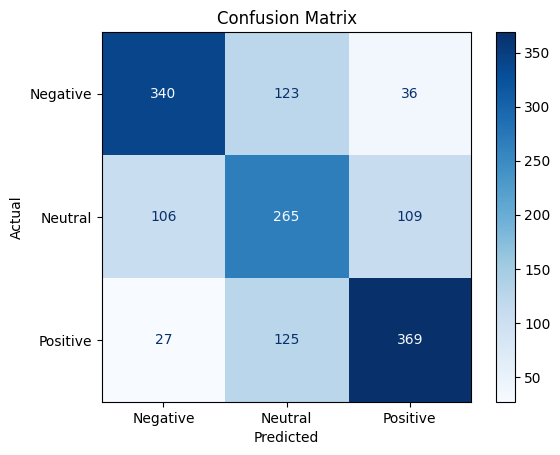

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


# Print the classification report
print(classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"]))

# Generate the confusion matrix with string labels
cm = confusion_matrix(y_test, y_pred, labels=["Negative", "Neutral", "Positive"])  # Use string labels
print("\nConfusion Matrix:")
print(cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Roberta Model


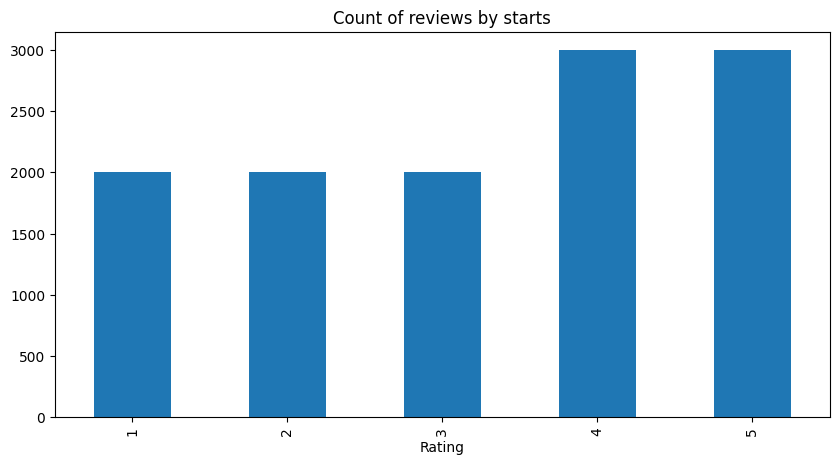

In [ ]:
xa = df['rating'].value_counts().sort_index().plot(kind = 'bar',
                                                   title = 'Count of reviews by starts',
                                                   figsize = (10, 5))
xa.set_xlabel('Rating')
plt.show()

In [ ]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import RobertaTokenizer
from scipy.special import softmax
from tqdm import tqdm

In [ ]:
#MODEL = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
#

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# Creating a sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df = df.head(6000)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def polarity_scores_roberta(df):

    # Tokenize the input text
    encoded_text = tokenizer(df, return_tensors='pt', truncation=True, padding=True)

    # Get the vocabulary size
    vocab_size = tokenizer.vocab_size

    # Replace out-of-vocabulary token IDs with teh [UNK] token ID
    # Assuming tokenizer.unk_token_id is the ID for [UNK]
    encoded_text['input_ids'] = torch.clamp(encoded_text['input_ids'], 0, vocab_size -1)

    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    # Return scores as a dictionary
    scores_dict ={
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['lemmatize_text']
    myid = row['reviewerID']

    roberta_result = polarity_scores_roberta(text)
    rs = {**roberta_result}
    res[myid] = rs # Overwriting previous value with roberta_result
  except (RuntimeError, IndexError) as e:
    print(f"Error processing text: {text}")
    print(f"Error details: {e}")
    print(f'Broke for id {myid}')
    raise




  0%|          | 0/6000 [00:00<?, ?it/s]

In [ ]:
#Filter out Null values from 'res'
#filtered_res = {k: v for k, v in res.items() if v is not None}

results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'reviewerID'})
results_df = results_df.merge(df, how ='left')

In [ ]:
results_df.head()

,reviewerID,roberta_neg,roberta_neu,roberta_pos,rating,reviewText,reviewTime,reviewerName,summary,unixReviewTime,cleaned-review,stemmed_text,lemmatize_text
0,A3HHXRELK8BHQG,0.411955,0.518773,0.069272,3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",Ridley,Entertaining But Average,1283385600,jace rankin may short hes nothing mess man hau...,jace rankin may short he noth mess man haul sa...,jace rankin may short he nothing mess man haul...
1,A3HHXRELK8BHQG,0.411955,0.518773,0.069272,1,"""Dani Standifer arrives home at her West Texas...","12 17, 2009",Ridley,Just not good.,1261008000,dani standifer arrives home west texas family ...,dani standif arriv home west texa famili ranch...,dani standifer arrive home west texas family r...
2,A2RGNZ0TRF578I,0.002295,0.023695,0.974010,5,Great short read. I didn't want to put it dow...,"10 8, 2013",Holly Butler,Terrific menage scenes!,1381190400,great short read didnt want put read one sitti...,great short read didnt want put read one sit s...,great short read didnt want put read one sit s...
3,A2RGNZ0TRF578I,0.002295,0.023695,0.974010,5,"This book was not only steamy, but it made me ...","10 8, 2013",Holly Butler,Steamy and funny at the same time!,1381190400,book steamy made laugh really enjoyed characte...,book steami made laugh realli enjoy charact wa...,book steamy make laugh really enjoy character ...
4,A3S0H2HV6U1I7F,0.047467,0.421636,0.530897,3,I'll start by saying this is the first of four...,"04 11, 2014",Merissa,Snapdragon Alley,1397174400,ill start saying first four books wasnt expect...,ill start say first four book wasnt expect 34c...,ill start say first four book wasnt expect 34c...


## Compare

In [ ]:
results_df.columns

Index(['reviewerID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'rating',
       'reviewText', 'reviewTime', 'reviewerName', 'summary', 'unixReviewTime',
       'cleaned-review', 'stemmed_text', 'lemmatize_text'],
      dtype='object')

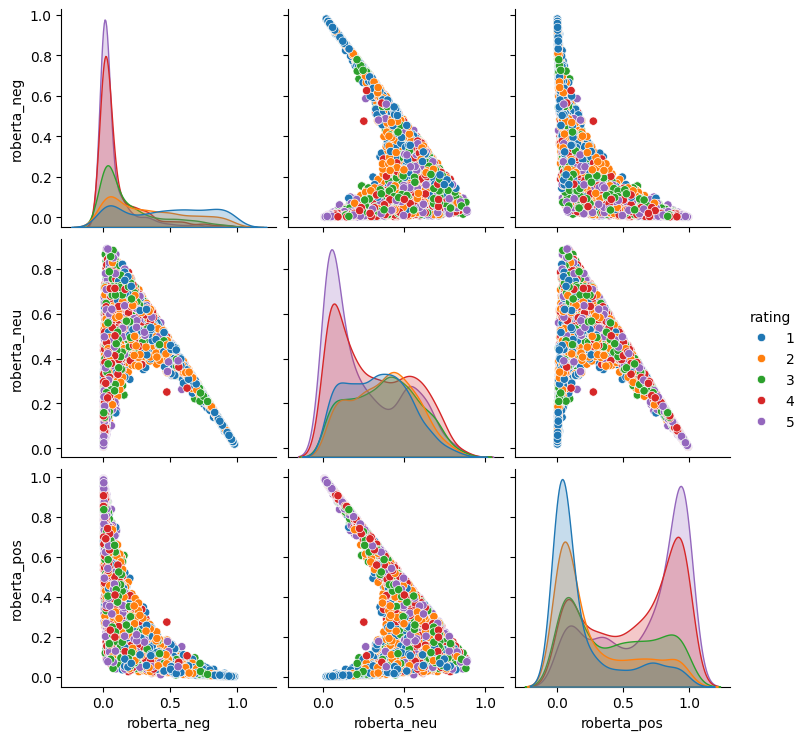

In [ ]:
# Using seaborn to plot to show the difference between roberta_neg, roberta_neu and roberta_pos
sns.pairplot(data=results_df, vars=['roberta_neg',	'roberta_neu',	'roberta_pos'], hue='rating', palette='tab10' )

In [ ]:
results_df.query('rating == 5').sort_values('roberta_pos', ascending=False)['lemmatize_text'].values[10]

'really love book shorter others really love character feisty fun make laugh awesome steamy scene definitely must read'

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER for comparison
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer (VADER)
sia = SentimentIntensityAnalyzer()

# Load RoBERTa model and tokenizer
MODEL = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Function for polarity scores using RoBERTa
def polarity_scores_roberta(text):
    """
    Function to compute sentiment scores using RoBERTa
    """
    # Tokenize and prepare the input text
    encoded_text = tokenizer(text, return_tensors='pt', truncation=True)

    # Handle out-of-vocabulary token IDs
    vocab_size = tokenizer.vocab_size
    encoded_text['input_ids'] = torch.clamp(encoded_text['input_ids'], 0, vocab_size - 1)

    # Get model output
    with torch.no_grad():
        output = model(**encoded_text)

    # Convert logits to probabilities
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)

    # Return scores as a dictionary
    return {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

# Initialize a results dictionary
res = {}

# Iterate over the dataframe to compute both VADER and RoBERTa scores
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        # Extract text and ID
        text = row['lemmatize_text']  # Ensure this column exists in your DataFrame
        myid = row['reviewerID']      # Ensure this column exists in your DataFrame

        # Get VADER scores
        vader_scores = sia.polarity_scores(text)

        # Get RoBERTa scores
        roberta_scores = polarity_scores_roberta(text)

        # Combine results
        res[myid] = {**vader_scores, **roberta_scores}
    except RuntimeError as e:
        print(f"Broke for id {myid}: {e}")

# Convert the results into a DataFrame
results_df = pd.DataFrame.from_dict(res, orient='index').reset_index()
results_df = results_df.rename(columns={'index': 'reviewerID'})

# Merge with the original DataFrame
results_df = results_df.merge(df, how='left', on='reviewerID')

# Inspect the columns
print(results_df.columns)

# Pairplot of sentiment scores
sns.pairplot(data=results_df, vars=['roberta_neg', 'roberta_neu', 'roberta_pos'], hue='rating', palette='tab10')
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

  4%|▍         | 456/12000 [01:52<30:53,  6.23it/s]

Broke for id A2E9HDZXQORZLA: The expanded size of the tensor (748) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 748].  Tensor sizes: [1, 514]


  8%|▊         | 912/12000 [03:56<47:51,  3.86it/s]


IndexError: index out of range in self

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
import pandas as pd
import nltk

# Load RoBERTa model and tokenizer
MODEL = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Define function to get polarity scores
def polarity_scores_roberta(text):
    try:
        # Tokenize the input text (truncate to max length of 512 tokens)
        encoded_text = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)

        # Perform inference
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        # Return scores as a dictionary
        return {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }
    except Exception as e:
        print(f"Error processing text: {text[:50]}... - {str(e)}")
        return None  # Return None for problematic texts

# Initialize result storage
res = {}

# Iterate through the dataset
for i, row in tqdm(df_all.iterrows(), total=len(df_all)):
    try:
        text = row['lemmatize_text']  # Replace with your text column name
        myid = row['reviewerID']      # Replace with your ID column name

        # Get RoBERTa polarity scores
        roberta_result = polarity_scores_roberta(text)

        if roberta_result:  # Only save results if not None
            res[myid] = roberta_result
    except Exception as e:
        print(f"Broke for id {myid}: {str(e)}")

# Convert results to DataFrame
results_df = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'reviewerID'})

# Merge results with original DataFrame
final_df = results_df.merge(df_all, how='left', on='reviewerID')

# Display final DataFrame structure
print(final_df.head())

100%|██████████| 6000/6000 [26:38<00:00,  3.75it/s]


       reviewerID  roberta_neg  roberta_neu  roberta_pos  rating  \
0  A1W15QG2GJCX1B     0.069918     0.494416     0.435666       3   
1  A2G40UM2BSYTO8     0.635673     0.283825     0.080502       2   
2  A1VTZ3WUU5ORH7     0.008726     0.202560     0.788715       5   
3  A2EJB1SYOTWK5V     0.007642     0.339375     0.652983       3   
4  A2SU0B8S0VWPH8     0.006834     0.238881     0.754285       3   

                                          reviewText   reviewTime  \
0  I wouldn't call it original. I have read sever...   09 7, 2012   
1  I knew when I got this that it was flash ficti...   07 8, 2012   
2  Two cowboys save a lady running from a cheatin...   09 6, 2012   
3  It was a quick read and was straight to the po...  03 10, 2013   
4  Not sure how I would cataloge this book. Not m...  05 28, 2014   

   reviewerName          summary  unixReviewTime  \
0        Ally D    An Okay read!      1346976000   
1  Fallen Angel   Disappointing.      1341705600   
2        Alared  Str